# GUI using Gradio

In [38]:
!pip install gradio

                                              0.0/19.7 MB ? eta -:--:--
                                              0.1/19.7 MB 3.8 MB/s eta 0:00:06
                                              0.3/19.7 MB 3.7 MB/s eta 0:00:06
     -                                        0.8/19.7 MB 7.7 MB/s eta 0:00:03
     --                                       1.4/19.7 MB 8.6 MB/s eta 0:00:03
     ---                                      1.9/19.7 MB 9.3 MB/s eta 0:00:02
     -----                                    2.6/19.7 MB 10.3 MB/s eta 0:00:02
     ------                                   3.2/19.7 MB 10.7 MB/s eta 0:00:02
     --------                                 4.0/19.7 MB 11.5 MB/s eta 0:00:02
     ---------                                4.8/19.7 MB 12.2 MB/s eta 0:00:02
     -----------                              5.6/19.7 MB 12.9 MB/s eta 0:00:02
     -------------                            6.5/19.7 MB 13.3 MB/s eta 0:00:01
     --------------                           7.4/19.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, which is not installed.
apache-beam 2.46.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.46.0 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.46.0 requires fasteners<1.0,>=0.3, which is not installed.
apache-beam 2.46.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.46.0 requires httplib2<0.22.0,>=0.8, which is not installed.
apache-beam 2.46.0 requires objsize<0.7.0,>=0.6.1, which is not installed.
apache-beam 2.46.0 requires proto-plus<2,>=1.7.1, which is not installed.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, which is not installed.
apache-beam 2.46.0 requires pydot<2,>=1.2.0, which is not installed.
apache-beam 2.46.0 req

In [59]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2


# Function to perform image recognition
def recognize_image(input_image):
    # Load the TensorFlow model
    model = tf.saved_model.load('PRETRAINED_MODEL_PATH')  # Replace with the path to your saved model
    
    # Preprocess the image
    image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (input_width, input_height))
    input_tensor = np.expand_dims(image_resized, 0)
    input_tensor = input_tensor.astype(np.uint8)
    
    # Perform object detection on the image
    detections = model(input_tensor)
    
    # Process the detection results
    # You can replace this with your own code to extract relevant information from detections
    
    # Draw bounding boxes on the image
    image_with_boxes = draw_boxes(input_image, detections)
    
    return image_with_boxes

# Function to draw bounding boxes on the image
def draw_boxes(image, detections):
    image_with_boxes = np.copy(image)
    image_height, image_width, _ = image.shape
    
    # Process the detection results and draw bounding boxes
    for detection in detections:
        # Extract the bounding box coordinates and class label
        box = detection['box']
        class_label = detection['class_label']
        
        # Scale the bounding box coordinates
        start_x = int(box[1] * image_width)
        start_y = int(box[0] * image_height)
        end_x = int(box[3] * image_width)
        end_y = int(box[2] * image_height)
        
        # Draw the bounding box rectangle on the image
        cv2.rectangle(image_with_boxes, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)
        
        # Add the class label text
        label_text = f'{class_label}'
        label_size, _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        text_width, text_height = label_size
        cv2.rectangle(image_with_boxes, (start_x, start_y - text_height - 5),
                      (start_x + text_width + 5, start_y), (0, 255, 0), -1)
        cv2.putText(image_with_boxes, label_text, (start_x + 2, start_y - 2),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
    
    return image_with_boxes

# Define input size for the model
input_width = 640
input_height = 480

# Create the Gradio interface
iface = gr.Interface(
    fn=recognize_image,
    inputs="image",
    outputs="image",
    title="Object Detection",
    description="Detect objects in an image.",
    allow_flagging=False
)

# Launch the interface
iface.launch()


C:\Users\SAURAV\TFODCourse\tfod\lib\site-packages\gradio\interface.py:326: UserWarning: The `allow_flagging` parameter in `Interface` nowtakes a string value ('auto', 'manual', or 'never'), not a boolean. Setting parameter to: 'never'.
  warnings.warn(


Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [53]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models','ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [8]:
if os.name=='nt':
    !pip install wget
    import wget

In [9]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [10]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
No local packages or working download links found for tensorflow-text~=2.11.0
error: Could not find suitable distribution for Requirement.parse('tensorflow-text~=2.11.0')


Obtaining file:///C:/Users/SAURAV/TFODCourse/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [11]:
!pip list

Package                      Version      Editable project location
---------------------------- ------------ ----------------------------------------------------------
absl-py                      1.4.0
apache-beam                  2.46.0
asttokens                    2.2.1
astunparse                   1.6.3
avro-python3                 1.10.2
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.2
contextlib2                  21.6.0
contourpy                    1.0.7
cycler                       0.11.0
Cython                       3.0.0b2
debugpy                      1.6.6
decorator                    5.1.1
easyocr                      1.6.2
executing                    1.2.0
filelock                     3.9.0
flatbuffers                  23.3.3
fonttools                    4.39.2
gast                         0.4.0
gin-config    

In [12]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

C:\Users\SAURAV\TFODCourse\tfod\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
Running tests under Python 3.9.13: C:\Users\SAURAV\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0628 17:45:40.899064  7520 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint 

In [29]:
!pip install tensorflow-addons==0.20.0
import tensorflow_addons as tfa

                                              0.0/746.7 kB ? eta -:--:--
     ------                                 122.9/746.7 kB 3.6 MB/s eta 0:00:01
     --------------------------             512.0/746.7 kB 6.4 MB/s eta 0:00:01
     -------------------------------------- 746.7/746.7 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 3.0.2
    Uninstalling typeguard-3.0.2:
      Successfully uninstalled typeguard-3.0.2
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.16.1
    Uninstalling tensorflow-addons-0.16.1:
      Successfully uninstalled tensorflow-addons-0.16.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.11.3 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.11.3 requires immutabledict, which is not installed.
tf-models-official 2.11.3 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.11.3 requires oauth2client, which is not installed.
tf-models-official 2.11.3 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.11.3 requires sentencepiece, which is not installed.
tf-models-official 2.11.3 requires seqeval, which is not installed.
tf-models-official 2.11.3 requires tensorflow-datasets, which is not installed.
tf-models-official 2.11.3 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-official 2.11.3 requires tensorflow-model-optimization>=0.4.1, which is not installed.
tf-models-official 2.11.3 require

In [12]:
!pip install gin-config

In [32]:
!pip install protobuf==3.20.1

  Using cached protobuf-3.20.1-cp39-cp39-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.3
    Uninstalling protobuf-4.23.3:
      Successfully uninstalled protobuf-4.23.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, which is not installed.
apache-beam 2.46.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.46.0 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.46.0 requires fasteners<1.0,>=0.3, which is not installed.
apache-beam 2.46.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.46.0 requires httplib2<0.22.0,>=0.8, which is not installed.
apache-beam 2.46.0 requires objsize<0.7.0,>=0.6.1, which is not installed.
apache-beam 2.46.0 requires orjson<4.0, which is not installed.
apache-beam 2.46.0 requires proto-plus<2,>=1.7.1, which is not installed.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, which is not installed.
apache-beam 2.46.0 requires

In [30]:
!pip install tensorflow --upgrade

                                              0.0/422.5 kB ? eta -:--:--
     ------------                           143.4/422.5 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 422.5/422.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\SAURAV\\TFODCourse\\tfod\\Lib\\site-packages\\google\\~.otobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Check the permissions.



In [16]:
!pip install matplotlib

In [20]:
!pip install Pillow

In [21]:
!pip install pyyaml

In [13]:
import object_detection

In [14]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  8% [......                                                                  ]  1794048 / 20515344

 26% [...................                                                     ]  5529600 / 20515344

 59% [..........................................                              ] 12214272 / 20515344

 88% [...............................................................         ] 18096128 / 20515344

100% [........................................................................] 20515344 / 20515344

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [15]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [16]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [17]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [18]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [19]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [20]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [21]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [22]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [23]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [24]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [25]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [26]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [48]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [49]:
!{command}

C:\Users\SAURAV\TFODCourse\tfod\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
W0618 21:18:08.964130  8716 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0618 21:18:08.979934  8716 mirro

# 7. Evaluate the Model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [30]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [31]:
# Prevent GPU complete consumption
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try: 
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    except RunTimeError as e:
        print(e)

In [32]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [33]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [35]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'],'test', 'Cars433.png')

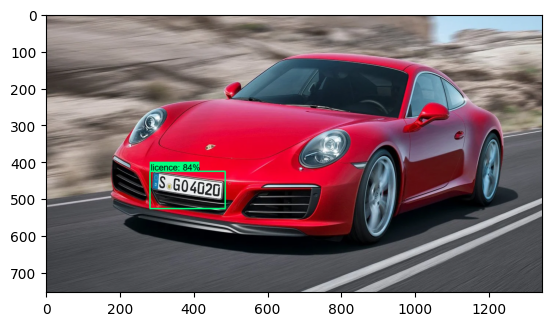

In [36]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [52]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

# Apply OCR to Detection

In [53]:
!pip install easyocr

In [54]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
                                              0.0/3.1 GB ? eta -:--:--
                                              0.0/3.1 GB 3.6 MB/s eta 0:14:01
                                              0.0/3.1 GB 2.2 MB/s eta 0:22:50
                                              0.0/3.1 GB 2.0 MB/s eta 0:24:52
                                              0.0/3.1 GB 2.7 MB/s eta 0:19:01
                                              0.0/3.1 GB 2.9 MB/s eta 0:17:25
                                              0.0/3.1 GB 2.9 MB/s eta 0:17:49
                                              0.0/3.1 GB 3.1 MB/s eta 0:16:25
                                              0.0/3.1 GB 3.2 MB/s eta 0:15:42
                                              0.0/3.1 GB 3.4 MB/s eta 0:14:55
                                              0.0/3.1 GB 3.3 MB/s eta 0:15:38
                                              0.0/3.1 GB 3.4 MB/s eta 0:15:03
  

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\SAURAV\TFODCourse\tfod\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\SAURAV\TFODCourse\tfod\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\SAURAV\TFODCourse\tfod\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in _fp_read
    data = self._fp.read(chunk_amt)
  File "C:\Users\SAURAV\TFODCourse\tfod\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\SAURAV\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\SAURAV\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\SAURAV\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\SAURAV\anaconda3\lib\ssl.p

In [57]:
import easyocr

In [58]:
detection_threshold = 0.7

In [59]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [60]:
width = image.shape[1]
height = image.shape[0]

[0.56601626 0.20935276 0.6988997  0.36206636]
[426.21024138 281.57946423 526.27146381 486.97925195]
[([[22, 12], [46, 12], [46, 48], [22, 48]], '', 0.0), ([[62.013606076167854, 7.0816364570071375], [203.91492701870476, 29.993203911709827], [192.98639392383214, 78.91836354299286], [51.08507298129524, 56.00679608829017]], 'Go4o20', 0.2872526183101113)]


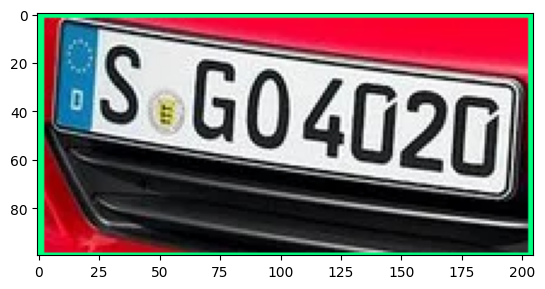

In [61]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

# OCR Filtering

In [63]:
region_threshold = 0.05

In [64]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [65]:
filter_text(region, ocr_result, region_threshold)

['Go4o20']

# Bring it Together

In [70]:
region_threshold = 0.6

In [71]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

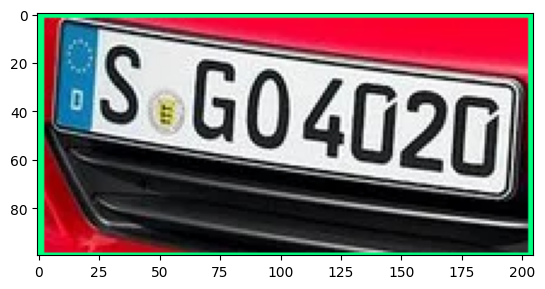

[]


In [72]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

# Save Results

In [73]:
import csv
import uuid

In [74]:
'{}.jpg'.format(uuid.uuid1())

'b12bb9a6-0485-11ee-8f12-b48c9d2e161f.jpg'

In [75]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [76]:
region

array([[[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [ 42,   1, 251],
        [127, 255,   0],
        [127, 255,   0]],

       ...,

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [ 49,  49,  49],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [ 44,  44,  44],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]]

In [77]:
save_results(text, region, 'detection_results.csv', 'Detection_Images')

# 10. Real Time Detections from your Webcam

In [51]:
!pip install opencv-python==3.4.11.43

                                              0.0/87.4 MB ? eta -:--:--
                                              0.1/87.4 MB 4.3 MB/s eta 0:00:21
                                              0.5/87.4 MB 7.6 MB/s eta 0:00:12
                                              1.1/87.4 MB 10.2 MB/s eta 0:00:09
                                              1.9/87.4 MB 12.3 MB/s eta 0:00:07
                                              2.1/87.4 MB 12.1 MB/s eta 0:00:08
                                              2.1/87.4 MB 12.1 MB/s eta 0:00:08
                                              2.1/87.4 MB 12.1 MB/s eta 0:00:08
     -                                        2.2/87.4 MB 6.3 MB/s eta 0:00:14
     -                                        2.9/87.4 MB 7.5 MB/s eta 0:00:12
     -                                        3.8/87.4 MB 8.7 MB/s eta 0:00:10
     --                                       4.8/87.4 MB 10.0 MB/s eta 0:00:09
     --                                       6.0/87.

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [210 lines of output]
  
  
  --------------------------------------------------------------------------------
  -- Trying 'Ninja (Visual Studio 17 2022 x64 v143)' generator
  --------------------------------
  ---------------------------
  ----------------------
  -----------------
  ------------
  -------
  --
  Not searching for unused variables given on the command line.
  CMake Error at CMakeLists.txt:2 (PROJECT):
    Running
  
     'C:/Users/SAURAV/TFODCourse/tfod/Scripts/ninja.exe' '--version'
  
    failed with:
  
     Traceback (most recent call last):
      File "C:\Users\SAURAV\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
        return _run_code(code, main_globals, None,
      File "C:\Users\SAURAV\anaconda3\lib\runpy.py", line 87, in _run_code
        exec(code, run_globals)
      File "C:\Users\SAURAV\TFODCourse\tfod\Scripts\ninja.exe\__main__.py", line 4, in <module>
  
    ModuleNotFoundError: N

In [49]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    try: 
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        save_results(text, region, 'realtimeresults.csv', 'Detection_Images')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

ValueError: in user code:

    File "C:\Users\SAURAV\AppData\Local\Temp\ipykernel_25004\1007919961.py", line 11, in detect_fn  *
        image, shapes = detection_model.preprocess(image)
    File "C:\Users\SAURAV\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\meta_architectures\ssd_meta_arch.py", line 485, in preprocess  *
        normalized_inputs, self._image_resizer_fn)
    File "C:\Users\SAURAV\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\utils\shape_utils.py", line 492, in resize_images_and_return_shapes  *
        outputs = static_or_dynamic_map_fn(
    File "C:\Users\SAURAV\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\utils\shape_utils.py", line 246, in static_or_dynamic_map_fn  *
        outputs = [fn(arg) for arg in tf.unstack(elems)]
    File "C:\Users\SAURAV\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\core\preprocessor.py", line 3330, in resize_image  *
        new_image = tf.image.resize_images(

    ValueError: 'images' must have either 3 or 4 dimensions.


# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')